In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
file_path = '/content/drive/MyDrive'
files = os.listdir(file_path)
print(files)

['FruitinAmazon', 'DevanagariHandwrittenDigitDataset', 'Classroom', 'Sample Report (2) (1).gdoc', 'Artificial Intelligence.docx', 'W5W.gdoc', 'W5T.gdoc', 'Untitled Diagram.drawio', 'WIN_20230128_16_10_33_Pro.mp4', '4CS015-Tutorial- W11.gdoc', 'cesar_cipher_np03cs4a220351.gdoc', 'Cloud Computing.gslides', 'Cloud Computing V2.gslides', 'AI Main.gslides', 'Colab Notebooks', 'system', '2331428_Aadarsha Ratna Shakya', 'Research on seven topics by group 4.gdoc', 'users.csv.gsheet', 'HRMS', 'Copy of 47458-free hr ppt templates.gslides', 'Usability and Accessibility Videos', 'presentation.pptx', 'unity', 'Untitled spreadsheet (2).gsheet', 'POLYGON Horror Mansion - Low Poly 3D Art by Synty v1.06.unitypackage', 'nvidia_stock_price (1).xls', 'Untitled spreadsheet (1).gsheet', 'nvidia_stock_price.xls', 'Untitled spreadsheet.gsheet', 'Base paper m 2019_2025.xlsx', 'facial expression classification', 'Assignment - I - Image Classification with CNN.pdf', 'Test Case of WebCraft.gsheet', 'trumptweets_s

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow

In [4]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/Test"

In [5]:
img_height, img_width = 28,28
def load_images_from_folder(folder):
  images=[]
  labels=[]
  class_names = sorted(os.listdir(folder))
  class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels
  for class_name in class_names:
    class_path = os.path.join(folder, class_name)
    label = class_map[class_name]
    for filename in os.listdir(class_path):
      img_path = os.path.join(class_path, filename)
      # Load image using PIL
      img = Image.open(img_path).convert("L") # Convert to grayscale
      img = img.resize((img_width, img_height)) # Resize to (28,28)
      img = np.array(img) / 255.0 # Normalize pixel values to [0,1]
      images.append(img)
      labels.append(label)
  return np.array(images), np.array(labels)

Training set: (15884, 28, 28, 1), Labels: (15884, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


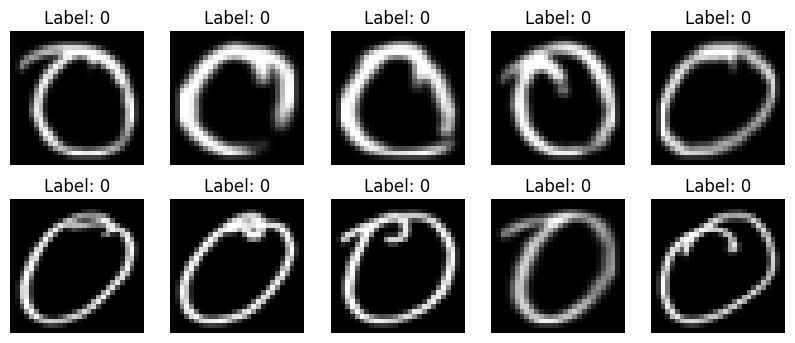

In [6]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap="gray")
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 , 28 , 1)
x_test = x_test.reshape(-1, 28 , 28 , 1)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape, y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1) (60000, 10)


In [8]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
  [
    keras.layers.Input(shape=input_shape),
    keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
    keras.layers.Dense(64, activation="sigmoid"),
    keras.layers.Dense(128, activation="sigmoid"),
    keras.layers.Dense(256, activation="sigmoid"),
    keras.layers.Dense(num_classes, activation="softmax"),
  ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
  optimizer="sgd", # Stochastic Gradient Descent
  loss="categorical_crossentropy", # Loss function for multi-class classification
  metrics=["accuracy"] # Track accuracy during training
)

In [10]:
import tensorflow as tf
from tensorflow import keras
batch_size = 128
epochs = 20
# Callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks
)


Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1065 - loss: 2.3323 - val_accuracy: 0.1331 - val_loss: 2.3012
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1129 - loss: 2.2999 - val_accuracy: 0.1063 - val_loss: 2.2995
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1159 - loss: 2.2988 - val_accuracy: 0.1063 - val_loss: 2.2979
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.1172 - loss: 2.2977 - val_accuracy: 0.1063 - val_loss: 2.2990
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1185 - loss: 2.2960 - val_accuracy: 0.1173 - val_loss: 2.2961
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1262 - loss: 2.2941 - val_accuracy: 0.1063 - val_loss: 2.2930
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1373 - loss: 2.2920 - val_accuracy: 0.1063 - val_loss: 2.2903
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.1296 - loss: 2.2890 - val_accuracy: 0.

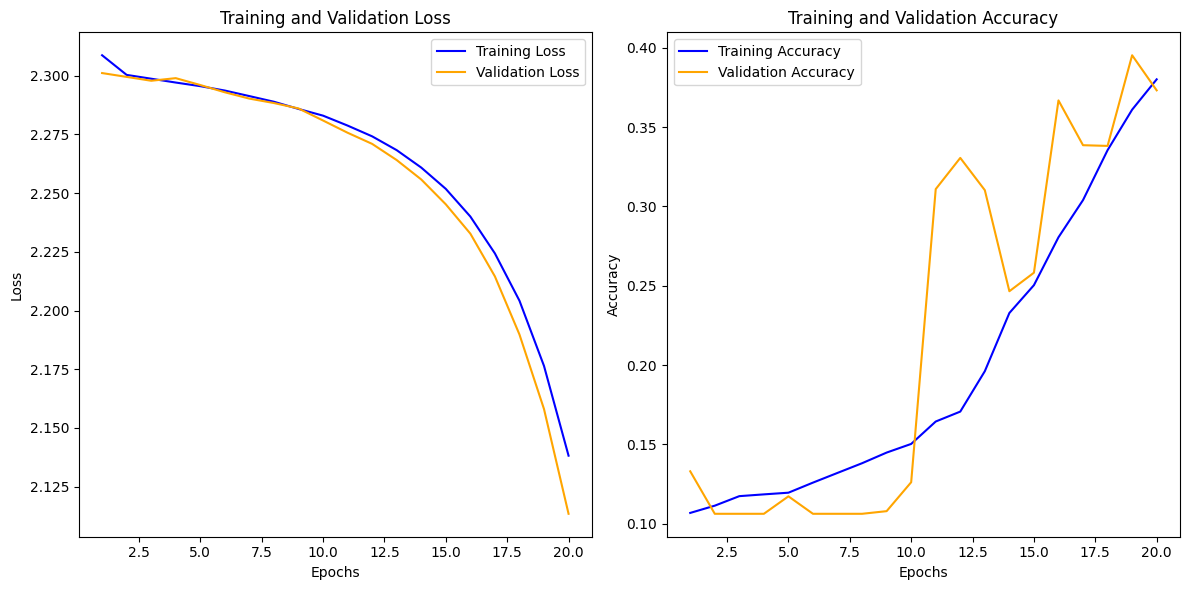

In [11]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.3688 - loss: 2.1111
Test accuracy: 0.3688


In [13]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


In [14]:
model.save('AadarshaShakya.h5')

In [15]:
loaded_model = tf.keras.models.load_model('AadarshaShakya.h5')